# Exploring the Building Elevation and Subgrade (BES) Dataset for New York City in Python
Mark Bauer

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import urllib
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [2]:
# Printing verions of Python modules and packages with **watermark** - the IPython magic extension.
%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
matplotlib: 3.5.2
seaborn   : 0.11.2



![cover-photo](images/dataset-cover-photo.png)

Link to dataset website: https://data.cityofnewyork.us/City-Government/Building-Elevation-and-Subgrade-BES-/bsin-59hv

# Download data dictionary

In [3]:
# download url of data dictionary
url = 'https://data.cityofnewyork.us/api/views/bsin-59hv/files/03455783-2880-43f9-9e53-718ecb353c47\
?download=true&filename=Building_Elevation_and_Subgrade-Data_Dictionary.xlsx'

file_name = 'Building_Elevation_and_Subgrade-Data_Dictionary.xlsx'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls

Building Elevation and Subgrade Dataset Guidance.pdf
Building_Elevation_and_Subgrade-Data_Dictionary.xlsx
README.md
exploratory.ipynb
images/
~$Building_Elevation_and_Subgrade-Data_Dictionary.xlsx


# Download dataset guidance PDF

In [4]:
# download url of dataset guidance
url = 'https://data.cityofnewyork.us/api/views/bsin-59hv/files/ae1b369c-6ce1-4805-9ad0-aca9f62f3182\
?download=true&filename=Building%20Elevation%20and%20Subgrade%20Dataset%20Guidance.pdf'

file_name = 'Building Elevation and Subgrade Dataset Guidance.pdf'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls

Building Elevation and Subgrade Dataset Guidance.pdf
Building_Elevation_and_Subgrade-Data_Dictionary.xlsx
README.md
exploratory.ipynb
images/
~$Building_Elevation_and_Subgrade-Data_Dictionary.xlsx


# Exploratory Data Analysis
Link to dataset website: https://data.cityofnewyork.us/City-Government/Building-Elevation-and-Subgrade-BES-/bsin-59hv

In [5]:
# read in data from NYC Open Data
url = 'https://data.cityofnewyork.us/api/views/bsin-59hv/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# preview data
rows, cols = df.shape
print('rows: {:,}\ncolumns: {}'.format(rows, cols))

df.head()

rows: 861,876
columns: 26


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


In [6]:
# building identification number is unique?
is_unique = df['bin'].is_unique

print('bin field is unique: {}'.format(is_unique))

bin field is unique: True


In [7]:
# preview datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861876 entries, 0 to 861875
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   the_geom    861876 non-null  object 
 1   bin         861876 non-null  int64  
 2   bbl         861876 non-null  int64  
 3   borough     861875 non-null  float64
 4   block       861875 non-null  float64
 5   lot         861876 non-null  int64  
 6   address     844875 non-null  object 
 7   z_grade     861876 non-null  float64
 8   z_floor     861876 non-null  float64
 9   subgrade    861876 non-null  object 
 10  notes1      861876 non-null  object 
 11  notes2      202458 non-null  object 
 12  notes3      472003 non-null  object 
 13  x           861876 non-null  float64
 14  y           861876 non-null  float64
 15  latitude    861876 non-null  float64
 16  longitude   861876 non-null  float64
 17  pluto_bbl   861876 non-null  int64  
 18  Council     861876 non-null  int64  
 19  Bo

In [8]:
# preview null counts per column
(df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

notes2        659418
notes3        389873
address        17001
borough            1
block              1
the_geom           0
longitude          0
CDTA2020           0
NTAName            0
NTA2020            0
BoroCT2020         0
CTLabel            0
BoroCD             0
Council            0
pluto_bbl          0
x                  0
latitude           0
y                  0
bin                0
notes1             0
subgrade           0
z_floor            0
z_grade            0
lot                0
bbl                0
CDTAName           0
dtype: int64

In [9]:
# summary statistics of selected numeric columns
cols = [
    'bin', 'bbl', 'borough', 'block', 'lot', 'address',
    'z_grade', 'z_floor',  'x', 'y', 'latitude', 'longitude',
]

(df
 .loc[:, cols]
 .describe()
 .T
)

,count,mean,std,min,25%,50%,75%,max
bin,861876.0,3.610723e+06,1.053307e+06,1.000003e+06,3.089156e+06,4.026428e+06,4.259005e+06,5.799523e+06
bbl,861876.0,3.517133e+09,1.034376e+09,1.090961e+06,3.032080e+09,4.010520e+09,4.105200e+09,6.000000e+09
borough,861875.0,3.464081e+00,1.026240e+00,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
block,861875.0,5.310379e+03,3.725974e+03,1.000000e+00,2.295000e+03,4.860000e+03,7.498000e+03,9.999900e+04
lot,861876.0,1.521700e+02,8.358621e+02,0.000000e+00,1.800000e+01,3.800000e+01,6.400000e+01,9.999000e+03
z_grade,861876.0,5.391501e+01,4.219290e+01,-1.309600e+01,2.330400e+01,4.432800e+01,7.270925e+01,4.028390e+02
z_floor,861876.0,5.811370e+01,4.256067e+01,0.000000e+00,2.743800e+01,4.837000e+01,7.706300e+01,4.043970e+02
x,861876.0,1.006345e+06,3.288964e+04,9.132653e+05,9.893564e+05,1.009009e+06,1.030179e+06,1.067283e+06
y,861876.0,1.916851e+05,3.058763e+04,1.209780e+05,1.681353e+05,1.895338e+05,2.113789e+05,2.726229e+05
latitude,861876.0,4.069272e+01,8.394630e-02,4.049848e+01,4.062814e+01,4.068681e+01,4.074674e+01,4.091492e+01


In [10]:
# summary statistics string columns
df.describe(include=['O']).T

,count,unique,top,freq
the_geom,861876,861876,POINT (-74.22274561187417 40.52134422844183),1
address,844875,796756,FINGERBOARD ROAD,423
subgrade,861876,2,Y,472003
notes1,861876,12,Property was Successfully Measured,646782
notes2,202458,9,"Commercial, Industrial or other Non-Residentia...",112354
notes3,472003,2,Visible Door or Window in subgrade space,310268
NTA2020,861876,256,SI0302,16194
NTAName,861876,256,Great Kills-Eltingville,16194
CDTA2020,861876,71,SI03,48095
CDTAName,861876,72,SI03 South Shore (CD 3 Approximation),48095


# Examining the measurement quality notes

![images](images/building-elevation-fields.png)

Screenshot of elevation columns from data dictionary.

![images](images/notes1-descriptions.png)

Screenshot of **notes_1** column data dictionary.

The `notes_1` column seems to tell us interesting information about the obstacles and quality of the measurement. Let's examine further and see what's there.

In [11]:
# preview building elevation measurements notes and corresponding count of unique values
df['notes1'].value_counts()

Property was Successfully Measured                                                                                                      646782
Property not Visible Due to Construction or Obstruction                                                                                 115281
Property was Successfully Measured; No Address Plate or Identification on Building                                                       61567
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building                                  17132
Property not Visible from Street; No Address Plate or Identification on Building                                                         12080
Property was Successfully Measured; Property Under Construction                                                                           2946
Vacant Lot; No Address Plate or Identification on Building                                                                                1957

In [12]:
# how many properties were successfully measured?
count = df.loc[df['notes1'] == 'Property was Successfully Measured'].shape[0]
measured_perc = count / df.shape[0] * 100

print("% of properties with 'Property was Successfully Measured' \
and no additional notes: {:.2f}%".format(measured_perc))

% of properties with 'Property was Successfully Measured' and no additional notes: 75.04%


Most of the properties were successfully measured. Now let's examine the quality of measurements by Neighborhood Tablulation Area (NTA).

In [13]:
# total counts by NTA
nta_counts = (
    df
    .groupby(by='NTAName')['bin']
    .count()
    .rename('count')
    .reset_index()
)

# counts that were measured successfully by NTA
nta_counts_measured = (
    df
    .loc[df['notes1'] == 'Property was Successfully Measured']
    .groupby(by='NTAName')['bin']
    .count()
    .rename('count_measured')
    .reset_index()
)

# merge both counts and count measured dataframes
nta_counts_merged = nta_counts.merge(
    nta_counts_measured,
    on='NTAName',
    how='left'
)

print('shape of data: {}'.format(nta_counts_measured.shape))
nta_counts_merged.head()

shape of data: (237, 2)


,NTAName,count,count_measured
0,Allerton,1662,1335.0
1,Alley Pond Park,7,NaN
2,Annadale-Huguenot-Prince's Bay-Woodrow,11386,9492.0
3,Arden Heights-Rossville,9250,7848.0
4,Astoria (Central),4283,2885.0


In [14]:
nta_counts_merged.isnull().sum()

NTAName            0
count              0
count_measured    19
dtype: int64

In [15]:
nta_counts_merged['count_measured'] = (
    nta_counts_merged['count_measured']
    .fillna(0)
    .astype(int)
)

nta_counts_merged['perc_measured'] = round(
    nta_counts_merged['count_measured'] / nta_counts_merged['count'] * 100, 4
)

# table of percent measured in ascending order by NTA
(nta_counts_merged
 .loc[
     (nta_counts_merged['count'] > 0)
     & (nta_counts_merged['count_measured'] == 0)]
 .sort_values(by='count', ascending=False)
 .reset_index(drop=True)
)

,NTAName,count,count_measured,perc_measured
0,Forest Park,30,0,0.0
1,Woodlawn Cemetery,23,0,0.0
2,Green-Wood Cemetery,20,0,0.0
3,Mount Olivet & All Faiths Cemeteries,19,0,0.0
4,Great Kills Park,9,0,0.0
5,United Nations,7,0,0.0
6,Jamaica Bay (East),7,0,0.0
7,Alley Pond Park,7,0,0.0
8,Claremont Park,7,0,0.0
9,Kissena Park,7,0,0.0


**Table xx: Neighborhoods that have buildings but none were measured successfully.**

There are neighborhoods that didn't have any buildings measured, as well as some with small values. Let's filter building measured > 0.

In [16]:
nta_counts_merged['count_measured'] = (
    nta_counts_merged['count_measured']
    .fillna(0)
    .astype(int)
)

nta_counts_merged['perc_measured'] = round(
    nta_counts_merged['count_measured'] / nta_counts_merged['count'] * 100, 4
)

# table of percent measured in ascending order by NTA
(nta_counts_merged
 .sort_values(by='perc_measured')
 .loc[nta_counts_merged['count_measured'] > 0]
 .head(20)
 .reset_index(drop=True)
)

,NTAName,count,count_measured,perc_measured
0,Pelham Bay Park,92,1,1.0870
1,Bronx Park,60,1,1.6667
2,Central Park,52,1,1.9231
3,Van Cortlandt Park,47,1,2.1277
4,Ferry Point Park-St. Raymond Cemetery,44,1,2.2727
5,Randall's Island,148,4,2.7027
6,Prospect Park,48,2,4.1667
7,The Battery-Governors Island-Ellis Island-Libe...,15,1,6.6667
8,Cunningham Park,14,1,7.1429
9,Inwood Hill Park,13,1,7.6923


**Table xx: Percent of properties that were successfully measured in ascending order by NTA.**

Now let's filter neigborhoods with count of buildings > 1000.

In [17]:
# table of percent measured in ascending order where count of buildings > 1,000 by NTA
(nta_counts_merged
 .loc[nta_counts_merged['count'] > 1000]
 .sort_values(by='perc_measured')
 .head(20)
 .reset_index(drop=True)
)

,NTAName,count,count_measured,perc_measured
0,Clinton Hill,2262,770,34.0407
1,Park Slope,6723,2381,35.4157
2,Fort Greene,2085,742,35.5875
3,Brooklyn Heights,1457,553,37.9547
4,Hamilton Heights-Sugar Hill,1623,636,39.1867
5,Upper West Side (Central),2755,1102,40.0000
6,Sunset Park (Central),4205,1708,40.6183
7,Carroll Gardens-Cobble Hill-Gowanus-Red Hook,7196,3156,43.8577
8,Prospect Heights,1798,797,44.3270
9,Bedford-Stuyvesant (East),8940,3989,44.6197


**Table xx: Percent of properties that were successfully measured in ascending order where count of properties were greater than 1,000 by NTA.**

Now let's examine percent of buildings measured in descending order.

In [18]:
# table of percent measured in descending order by NTA
(nta_counts_merged
 .sort_values(by='perc_measured', ascending=False)
 .head(20)
 .reset_index(drop=True)
)

,NTAName,count,count_measured,perc_measured
0,Holy Cross Cemetery,1,1,100.0000
1,Hollis,4126,3711,89.9418
2,Cambria Heights,5311,4773,89.8701
3,Queens Village,11852,10650,89.8583
4,Westerleigh-Castleton Corners,9101,8124,89.2649
5,Bayside,8615,7678,89.1236
6,Oakwood-Richmondtown,6106,5408,88.5686
7,Murray Hill-Broadway Flushing,7693,6809,88.5090
8,South Richmond Hill,3606,3174,88.0200
9,South Ozone Park,14474,12708,87.7988


**Table xx: Percent of properties that were successfully measured in descending order by NTA.**

Map and visualize these percentages by NTA.

In [19]:
# reading in NTA shape
url = 'https://data.cityofnewyork.us/api/geospatial/9nt8-h7nd?accessType=DOWNLOAD&method=export&format=Shapefile'
gdf = gpd.read_file(url)

# convert crs to 2263
gdf = gdf.to_crs(2263)

print('shape of data:', gdf.shape)
gdf.head()

shape of data: (262, 12)


,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23..."
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21..."
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19..."
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436..."
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ..."


In [20]:
# merge counts dataframe to geodataframe
gdf_merged = gdf.merge(
    nta_counts_merged,
    left_on='ntaname',
    right_on='NTAName'
)

gdf_merged.head()

,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry,NTAName,count,count_measured,perc_measured
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23...",Central Park,52,1,1.9231
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21...",Chelsea-Hudson Yards,2042,1095,53.6239
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19...",Chinatown-Two Bridges,1106,654,59.1320
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436...",East Harlem (North),1972,1318,66.8357
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",East Harlem (South),1019,577,56.6241


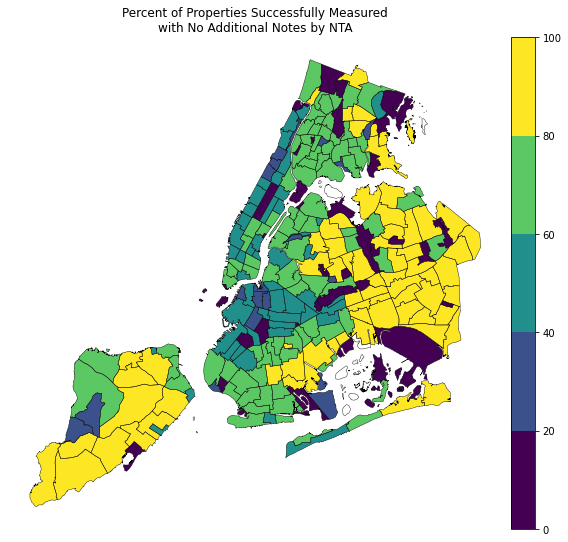

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm([0, 20, 40, 60, 80, 100], cmap.N)

gdf_merged.plot(
    column='perc_measured',
    legend=True,
    cmap=cmap,
    cax=cax,
    norm=norm,
    ax=ax
)

gdf.plot(ax=ax, facecolor='None', linewidth=.4)

ax.set_title('Percent of Properties Successfully Measured\n\
with No Additional Notes by NTA', fontsize=12)
ax.axis('off')
plt.tight_layout()

**Figure xx: Percent of properties that were successfully measured by Neighborhood Tabulation Area (NTA).**

Caption this for later.

# Examining building elevation measurements

`z_grade`: The elevation of the building at it's lowest adjacent grade - the lowest point where the building touches the ground.

`z_floor`: The elevation of what is estimated to be the lowest actively used floor.

Definitions from the data dictionary.

In [22]:
# summary statistics
(df
 .loc[:, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,861876.000000,861876.000000
mean,53.915012,58.113704
std,42.192895,42.560673
min,-13.096000,0.000000
25%,23.304000,27.438000
50%,44.328000,48.370000
75%,72.709250,77.063000
max,402.839000,404.397000


Check for values below grade.

In [23]:
counts = df.loc[df['z_grade'] < 0].shape[0]

print('count of properties where z_grade value < 0: {:,}'.format(counts))

count of properties where z_grade value < 0: 11


In [24]:
counts = df.loc[df['z_floor'] < 0].shape[0]

print('count of properties where z_floor value < 0: {:,}'.format(counts))

count of properties where z_floor value < 0: 0


Check for values equal to zero.

In [25]:
counts = df.loc[df['z_grade'] == 0].shape[0]

print('count of properties where z_grade is 0 (no measurement): {:,}'.format(counts))

count of properties where z_grade is 0 (no measurement): 14,039


In [26]:
counts = df.loc[df['z_floor'] == 0].shape[0]

print('count of properties where z_floor is 0 (no measurement): {:,}'.format(counts))

count of properties where z_floor is 0 (no measurement): 14,038


Interesting that there is one building that doesn't reconcile. Let's examine the measurement notes.

In [27]:
df.loc[
    (df['z_grade'] == 0)
    & (df['z_floor'] != 0)
]

,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
293509,POINT (-73.93461320916565 40.65265373387812),3109155,3048820020,3.0,4882.0,20,372 EAST 46 STREET,0.0,42.929,Y,...,-73.934613,3048820020,41,317,872.0,3087200,BK1703,East Flatbush-Rugby,BK17,BK17 East Flatbush (CD 17 Approximation)


In [28]:
bin_id = (
    df
    .loc[(df['z_grade'] == 0) & (df['z_floor'] != 0), 'bin']
    .values[0]
)

df.loc[df['bin'] == bin_id, ['bin', 'z_grade', 'z_floor', 'notes1']]

,bin,z_grade,z_floor,notes1
293509,3109155,0.0,42.929,Property was Successfully Measured


We can leave this record in for now, but it might be worth examining in the future. Let's drop all records where `z_floor` is zero.

In [29]:
# drop all records where z_floor is zero
df = (
    df
    .loc[df['z_floor'] != 0]
    .reset_index(drop=True)
)

print('new shape of data:', df.shape)
df.head()

new shape of data: (847838, 26)


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


In [30]:
# summary statistics
(df
 .loc[:, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,847838.000000,847838.000000
mean,54.807705,59.075916
std,41.961769,42.244047
min,-13.096000,0.703000
25%,24.227250,28.361000
50%,45.095000,49.224000
75%,73.342750,77.704750
max,402.839000,404.397000


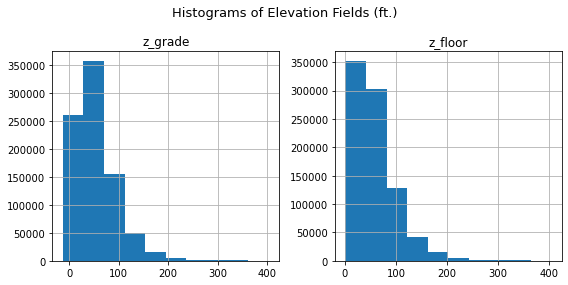

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

(df
 .loc[:, ['z_grade', 'z_floor']]
 .hist(ax=ax)
)

plt.suptitle('Histograms of Elevation Fields (ft.)', fontsize=13)
plt.tight_layout()

**Figure xx: Histograms of z_grade and z_floor values.**

Caption this for later.

Examine `z_grade` > `z_floor`.

In [32]:
counts = (
    df
    .loc[df['z_floor'] < df['z_grade']]
    .shape[0]
)

print('count of properties where z_floor is less than z_grade and z_floor is not zero: {:,}'.format(counts))

count of properties where z_floor is less than z_grade and z_floor is not zero: 316


Looks like there are 316 properties that seem to not be considered a first occupied floor. Let's check the notes.

In [33]:
# examine scenario
(df
 .loc[df['z_grade'] > df['z_floor'], ['notes1']]
 .value_counts()
)

notes1                                                                                                                              
Property was Successfully Measured                                                                                                      246
Property was Successfully Measured; No Address Plate or Identification on Building                                                       34
Property not Visible Due to Construction or Obstruction                                                                                  13
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building                                  10
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building; Property Under Construction      5
Property not Visible Due to Construction or Obstruction; Property Under Construction                                                      3
Property was Successfully M

We can leave these in, but they might not be considered a first occupied floor.

## Calculating height from building grade to floor

In [34]:
# height from building floor to grade
df['z_floor_grade'] = df['z_floor'] - df['z_grade']

df['z_floor_grade'].describe()

count    847838.000000
mean          4.268211
std           3.087679
min         -50.487000
25%           2.015000
50%           3.627000
75%           6.571000
max          94.440000
Name: z_floor_grade, dtype: float64

In [35]:
# average neighborhood grade to floor height
(df
 .groupby(by=['NTAName'])['z_floor_grade']
 .mean()
 .mean()
 .round(2)
)

3.82

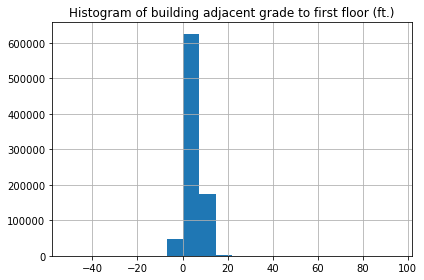

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

df['z_floor_grade'].hist(ax=ax, bins=20)

plt.title('Histogram of building adjacent grade to first floor (ft.)')
plt.tight_layout()

**Figure xx: Histogram of building adjacent grade to first floor (ft.).**

Caption this for later.

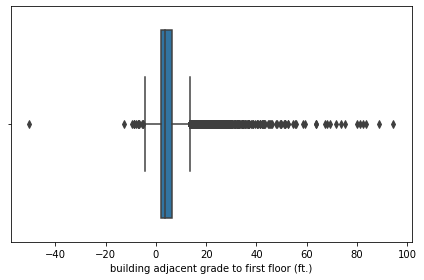

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(x=df["z_floor_grade"], ax=ax)

plt.xlabel('building adjacent grade to first floor (ft.)')
plt.tight_layout()

In [38]:
# mean grade to floor height by NTA
nta_mean = (
    df
    .groupby(by='NTAName')['z_floor_grade']
    .agg(['count', 'mean'])
    .reset_index()
)

# preview count measured dataframe
nta_mean.head()

,NTAName,count,mean
0,Allerton,1648,5.098075
1,Alley Pond Park,2,2.664000
2,Annadale-Huguenot-Prince's Bay-Woodrow,11167,4.735034
3,Arden Heights-Rossville,9024,3.823133
4,Astoria (Central),4250,4.041902


In [39]:
# reading in NTA shape
url = 'https://data.cityofnewyork.us/api/geospatial/9nt8-h7nd?accessType=DOWNLOAD&method=export&format=Shapefile'
gdf = gpd.read_file(url)

# convert crs to 2263
gdf = gdf.to_crs(2263)

print('shape of data:', gdf.shape)
gdf.head()

shape of data: (262, 12)


,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23..."
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21..."
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19..."
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436..."
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ..."


In [40]:
# merge dataframes to map
nta_mean_merged = gdf.merge(
    nta_mean,
    left_on='ntaname',
    right_on='NTAName',
    how='left'
)

# fill na with merge
nta_mean_merged['count'] = nta_mean_merged['count'].fillna(0).astype(int)
nta_mean_merged['mean'] = nta_mean_merged['mean'].round(4)

# table of percent measured in ascending order by NTA
(nta_mean_merged
 .sort_values(by='mean')
 .loc[:, ['ntaname', 'count', 'mean']]
 .head(20)
 .reset_index(drop=True)
)

,ntaname,count,mean
0,Shirley Chisholm State Park,1,0.1620
1,Rockaway Community Park,2,0.3555
2,Dyker Beach Park,5,0.4176
3,Cunningham Park,8,0.4344
4,Lincoln Terrace Park,1,0.5280
5,Holy Cross Cemetery,1,0.5670
6,McGuire Fields,3,0.7440
7,Montefiore Cemetery,1,0.9100
8,Barren Island-Floyd Bennett Field,17,0.9642
9,Soundview Park,2,1.0505


**Table xx: Average building grade to floor height in ascending order by NTA.**

In [41]:
# table of percent measured in ascending order by NTA
(nta_mean_merged
 .sort_values(by='mean', ascending=False)
 .loc[:, ['ntaname', 'count', 'mean']]
 .head(20)
 .reset_index(drop=True)
)

,ntaname,count,mean
0,Inwood Hill Park,7,8.2671
1,Hamilton Heights-Sugar Hill,1603,7.0013
2,Upper West Side (Central),2720,6.6553
3,Kingsbridge Heights-Van Cortlandt Village,995,6.5840
4,Park Slope,6704,6.3350
5,Riverdale-Spuyten Duyvil,2691,6.2038
6,Harlem (South),1945,6.1806
7,Brooklyn Heights,1432,6.1775
8,Washington Heights (South),1203,6.1525
9,Washington Heights (North),957,6.0770


**Table xx: Average building adjacent grade to floor height in descending order by NTA.**

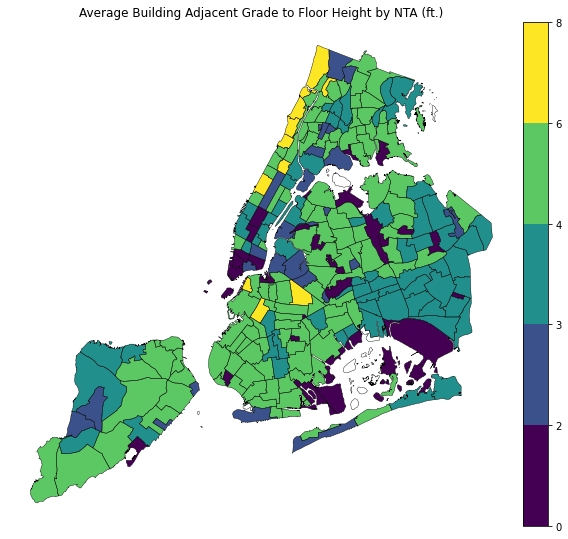

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm([0, 2, 3, 4, 6, 8], cmap.N)

nta_mean_merged.plot(
    column='mean',
    legend=True,
    cmap=cmap,
    cax=cax,
    norm=norm,
    ax=ax
)

gdf.plot(ax=ax, facecolor='None', linewidth=.4)

ax.set_title('Average Building Adjacent Grade to Floor Height by NTA (ft.)', fontsize=12)
ax.axis('off')
plt.tight_layout()

**Figure xx: Average Building Adjacent Grade to Floor Height by Neighborhood Tabulation Area (NTA).**

Caption this for later.

# Examining subgrade values

In [43]:
count_yes = (
    df
    .loc[df['subgrade'] == 'Y']
    .groupby(by='NTAName')['bin']
    .count()
    .rename('count_y')
    .reset_index()
)

count_yes.head()

,NTAName,count_y
0,Allerton,712
1,Annadale-Huguenot-Prince's Bay-Woodrow,4550
2,Arden Heights-Rossville,1907
3,Astoria (Central),2326
4,Astoria (East)-Woodside (North),2372


In [44]:
count_no = (
    df
    .loc[df['subgrade'] == 'N']
    .groupby(by='NTAName')['bin']
    .count()
    .rename('count_no')
    .reset_index()
)

count_no.head()

,NTAName,count_no
0,Allerton,936
1,Alley Pond Park,2
2,Annadale-Huguenot-Prince's Bay-Woodrow,6617
3,Arden Heights-Rossville,7117
4,Astoria (Central),1924


In [45]:
subgrade_df = count_yes.merge(
    count_no,
    on='NTAName',
    how='outer'
)

subgrade_df['count_y'] = subgrade_df['count_y'].fillna(0).astype(int)
subgrade_df['count_no'] = subgrade_df['count_no'].fillna(0).astype(int)

subgrade_df['count_total'] = subgrade_df['count_y'] + subgrade_df['count_no']
subgrade_df['subgrade_perc'] = round(subgrade_df['count_y'] / subgrade_df['count_total'] * 100, 2)

subgrade_df.head()

,NTAName,count_y,count_no,count_total,subgrade_perc
0,Allerton,712,936,1648,43.20
1,Annadale-Huguenot-Prince's Bay-Woodrow,4550,6617,11167,40.75
2,Arden Heights-Rossville,1907,7117,9024,21.13
3,Astoria (Central),2326,1924,4250,54.73
4,Astoria (East)-Woodside (North),2372,1994,4366,54.33


In [46]:
subgrade_df.describe()

,count_y,count_no,count_total,subgrade_perc
count,254.000000,254.000000,254.000000,254.000000
mean,1858.275591,1479.669291,3337.944882,41.384921
std,2003.987737,1484.128592,3232.635697,23.711816
min,0.000000,1.000000,1.000000,0.000000
25%,83.750000,354.000000,556.750000,25.105000
50%,1219.500000,1180.000000,2555.500000,45.955000
75%,2896.250000,2329.000000,5163.750000,59.990000
max,9790.000000,10069.000000,16062.000000,77.690000


In [47]:
# merge dataframes to map
nta_subgrade = gdf.merge(
    subgrade_df,
    left_on='ntaname',
    right_on='NTAName',
    how='left'
)

nta_subgrade.head()

,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry,NTAName,count_y,count_no,count_total,subgrade_perc
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23...",Central Park,1.0,15.0,16.0,6.25
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21...",Chelsea-Hudson Yards,735.0,1261.0,1996.0,36.82
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19...",Chinatown-Two Bridges,263.0,789.0,1052.0,25.00
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436...",East Harlem (North),630.0,1298.0,1928.0,32.68
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",East Harlem (South),358.0,641.0,999.0,35.84


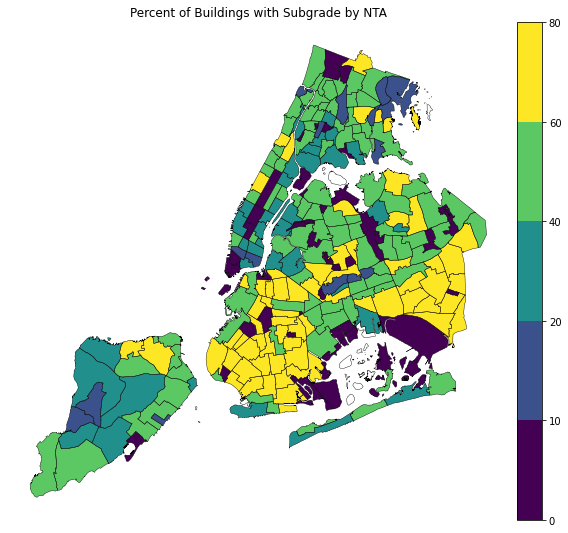

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm([0, 10, 20, 40, 60, 80], cmap.N)

nta_subgrade.plot(
    column='subgrade_perc',
    legend=True,
    cmap=cmap,
    cax=cax,
    norm=norm,
    ax=ax
)

gdf.plot(ax=ax, facecolor='None', linewidth=.4)

ax.set_title('Percent of Buildings with Subgrade by NTA', fontsize=12)
ax.axis('off')
plt.tight_layout()